<a href="https://colab.research.google.com/github/FarmiloeJ/Sales-Data-Project/blob/main/Sales_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

In [ ]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
##Commented out sections below were not viable options for importing the dataset.

##df = pd.read_csv("./Sales_data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_data')]

all_months_data = pd.DataFrame
df = pd.concat(map(pd.read_csv, ['./Sales_data/Sales_April_2019.csv', './Sales_data/Sales_August_2019.csv','./Sales_data/Sales_December_2019.csv', './Sales_data/Sales_February_2019.csv',
                                 './Sales_data/Sales_January_2019.csv','./Sales_data/Sales_January_2019.csv','./Sales_data/Sales_July_2019.csv','./Sales_data/Sales_June_2019.csv','./Sales_data/Sales_March_2019.csv',
                                 './Sales_data/Sales_May_2019.csv','./Sales_data/Sales_November_2019.csv','./Sales_data/Sales_October_2019.csv','./Sales_data/Sales_September_2019.csv']))


#for file in files:
##  df = pd.read_csv("./Sales_data/"+file)
##  all_months_data = pd.concat([all_months_data, df]).drop_duplicates(keep=false)
df.to_csv('all_data.csv', index=False)

In [ ]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**Clean up the data!**

In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')

In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

**Augment data with additional columns**

**Add Month Column**

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

**Add a sales column**

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

**Add a city column**

In [ ]:
def get_city(address):
  return address.split(',')[1]
def get_state(address):
  return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


**What was the Best Month for Sales? How much earned per month?**

In [ ]:
results = all_data.groupby('Month').sum()

<ipython-input-20-d9e765394c87>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


In [ ]:
import matplotlib.pyplot as plt

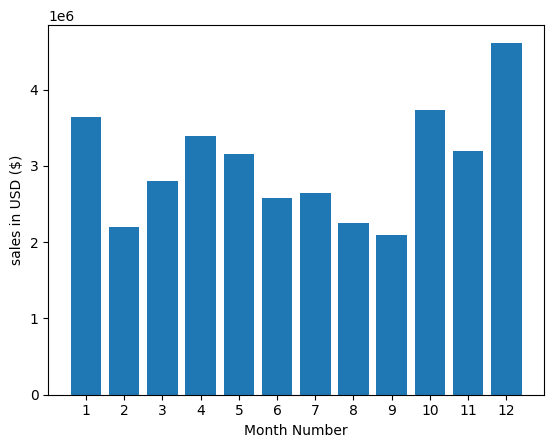

In [ ]:
months = range(1, 13)


plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

**What City had the highest number of sales?**

In [ ]:
results = all_data.groupby('City').sum()
print(results)

                     Quantity Ordered  Price Each   Month       Sales
City                                                                 
 Atlanta (GA)                   17479  2928435.73  105581  2944661.96
 Austin (TX)                    11733  1897036.82   70356  1907168.83
 Boston (MA)                    23699  3836337.41  142161  3861418.56
 Dallas (TX)                    17609  2895504.29  105408  2911440.90
 Los Angeles (CA)               35005  5707201.67  209855  5740184.66
 New York City (NY)             29429  4891979.50  177044  4923568.10
 Portland (ME)                   2888   469818.18   17267   472467.07
 Portland (OR)                  11856  1952239.80   71121  1962856.11
 San Francisco (CA)             52887  8642754.37  317874  8695307.36
 Seattle (WA)                   17362  2872836.57  105667  2888297.54


<ipython-input-23-18d2c1251d02>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


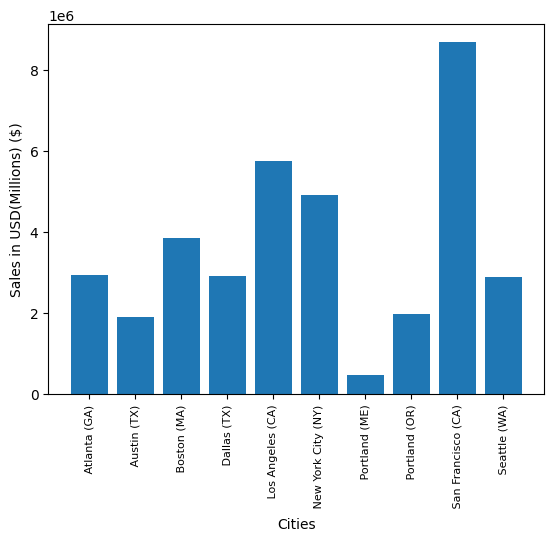

In [ ]:
Cities = [city for city, df in all_data.groupby('City')]


plt.bar(Cities, results['Sales'])
plt.xticks(Cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD(Millions) ($)')
plt.xlabel('Cities')
plt.show()

**What time should we display advertisements to maximize likelihood of customers buying product?**

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

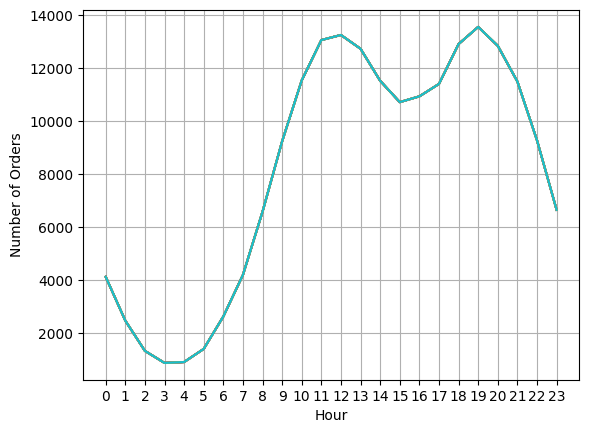

In [ ]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# My recommendation is around 11am (11) or 7pm (19)

**What products are most often sold together?**

In [ ]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(15)

<ipython-input-47-24f327503b3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable') 1228
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 1130
('Lightning Charging Cable', 'Lightning Charging Cable') 1128
('iPhone', 'Lightning Charging Cable') 1125
('Google Phone', 'USB-C Charging Cable') 1112
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 1077
('Wired Headphones', 'Wired Headphones') 1046
('Apple Airpods Headphones', 'Apple Airpods Headphones') 836
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 683
('iPhone', 'Wired Headphones') 517


**What product sold the most? Why did it sell the most?**

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


<ipython-input-61-feb8c3e0f2dd>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


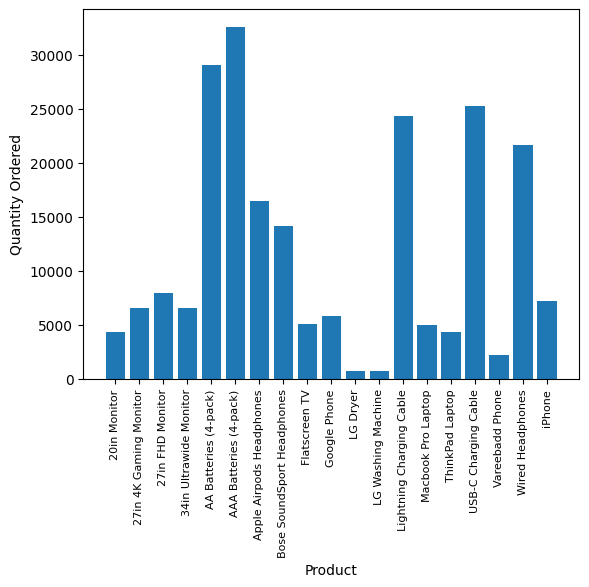

In [ ]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

<ipython-input-67-fd2588b2b8b0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
<ipython-input-67-fd2588b2b8b0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


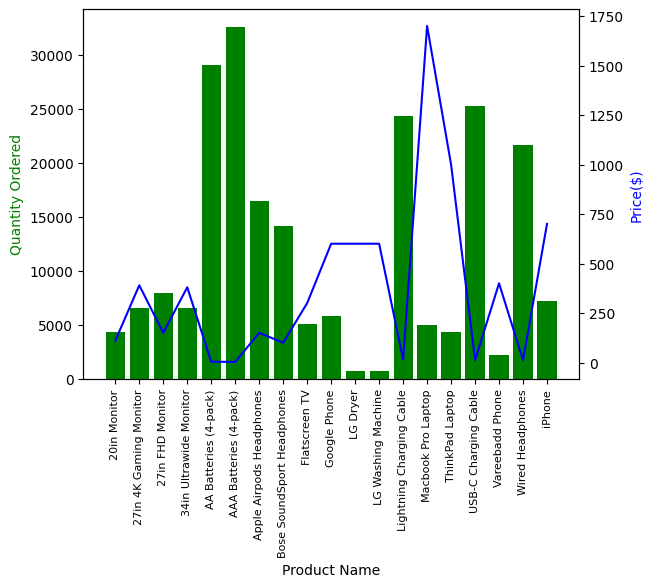

In [ ]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()